In [1]:
import requests
import pandas as pd

In [2]:
RANK_URL = "https://api.stock.naver.com/ranking/stock/local/total"
response = requests.get(RANK_URL)
response

<Response [200]>

In [3]:
datas = response.json()['datas']

data_list = []

for data in datas:
    ranking = data['ranking']
    reuters_code=data['reutersCode']
    stock_name=data['stockName']
    close_price= float(data['closePrice'].replace(",", ""))
    compare_previous_close_price = float(data['compareToPreviousClosePrice'].replace(",", ""))
    acc_trading_volume = data['accumulatedTradingVolume']
    market_value= data['marketValueHangeul']
    local_traded_at = data['localTradedAt']
    
    fin_data = {
        "순위" : ranking,
        "코드" : reuters_code,
        "종목명": stock_name,
        "종가": close_price,
        "전일종가대비": compare_previous_close_price,
        "누적거래량": acc_trading_volume,
        "시가총액": market_value,
        "거래시각": local_traded_at
    }
    
    data_list.append(fin_data)

In [4]:
df = pd.DataFrame(data_list)
df.head()

,순위,코드,종목명,종가,전일종가대비,누적거래량,시가총액,거래시각
0,1,373220,LG에너지솔루션,450000.0,-55000.0,"4,505,743","105조 3,000억원",2022-01-28T16:11:44+09:00
1,2,012450,한화에어로스페이스,47800.0,950.0,"498,925","2조 4,201억원",2022-01-28T16:12:00+09:00
2,3,005930,삼성전자,73300.0,2000.0,"21,051,150","437조 5,851억원",2022-01-28T16:11:46+09:00
3,4,205470,휴마시스,28400.0,6550.0,"39,844,784","9,720억원",2022-01-28T16:11:46+09:00
4,5,035720,카카오,85000.0,2400.0,"2,943,023","37조 9,020억원",2022-01-28T16:12:01+09:00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      10 non-null     int64  
 1   코드      10 non-null     object 
 2   종목명     10 non-null     object 
 3   종가      10 non-null     float64
 4   전일종가대비  10 non-null     float64
 5   누적거래량   10 non-null     object 
 6   시가총액    10 non-null     object 
 7   거래시각    10 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 768.0+ bytes


In [6]:
KOSPI_URL = "https://m.stock.naver.com/api/index/KOSPI/price?pageSize=10&page=1"
KOSDAQ_URL = "https://m.stock.naver.com/api/index/KOSDAQ/price?pageSize=10&page=1"

# 정석
kospi_data = requests.get(KOSPI_URL).json()
df_kospi = pd.DataFrame(kospi_data)
df_kospi

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2022-01-28,"2,663.34",48.85,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.87,"2,617.87","2,668.59","2,591.53"
1,2022-01-27,"2,614.49",-94.75,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-3.50,"2,709.24","2,722.86","2,614.49"
2,2022-01-26,"2,709.24",-11.15,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.41,"2,729.75","2,744.14","2,708.10"
3,2022-01-25,"2,720.39",-71.61,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-2.56,"2,786.41","2,789.62","2,703.99"
4,2022-01-24,"2,792.00",-42.29,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.49,"2,823.76","2,828.11","2,780.68"
5,2022-01-21,"2,834.29",-28.39,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.99,"2,837.49","2,847.95","2,817.11"
6,2022-01-20,"2,862.68",20.40,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.72,"2,842.28","2,862.70","2,830.97"
7,2022-01-19,"2,842.28",-21.96,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.77,"2,840.34","2,871.79","2,832.18"
8,2022-01-18,"2,864.24",-25.86,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.89,"2,898.98","2,902.79","2,857.26"
9,2022-01-17,"2,890.10",-31.82,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.09,"2,918.55","2,919.67","2,875.98"


In [7]:
df_kosdaq = pd.read_json(KOSDAQ_URL)
df_kosdaq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   localTradedAt                10 non-null     object 
 1   closePrice                   10 non-null     float64
 2   compareToPreviousClosePrice  10 non-null     float64
 3   compareToPreviousPrice       10 non-null     object 
 4   fluctuationsRatio            10 non-null     float64
 5   openPrice                    10 non-null     float64
 6   highPrice                    10 non-null     float64
 7   lowPrice                     10 non-null     float64
dtypes: float64(6), object(2)
memory usage: 768.0+ bytes


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# seaborn 테마를 matplotlib에서 사용하게 할 수 있다.
sns.set()

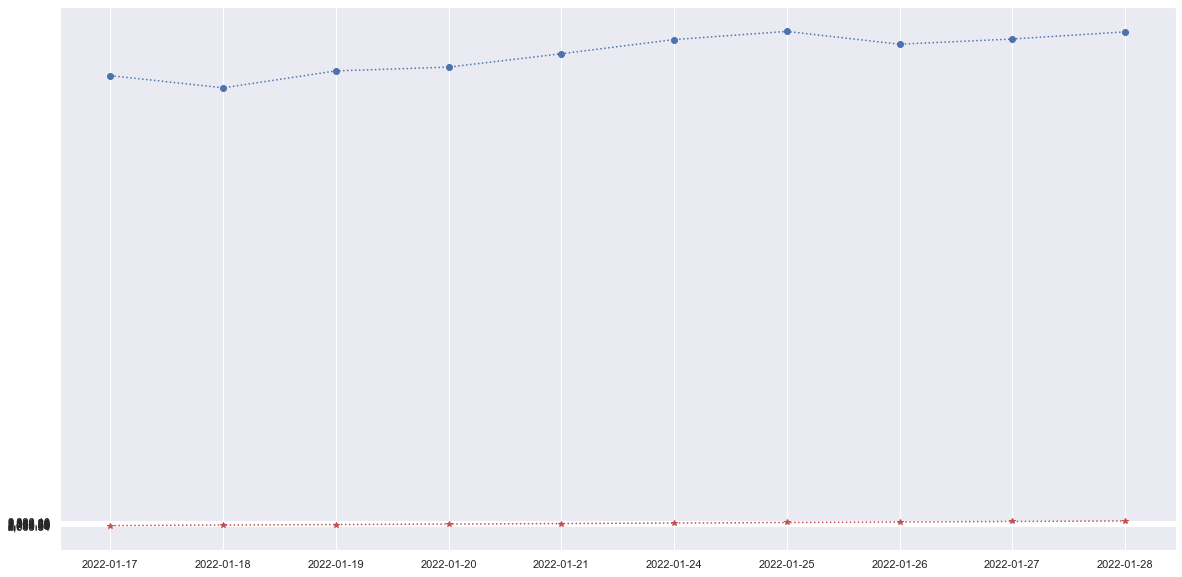

In [10]:
# 일자의 종가 등락 확인
plt.figure(figsize=(20, 10))

plt.plot(df_kospi["localTradedAt"].sort_values(), df_kospi["closePrice"], "r*:", label="kospi")
plt.plot(df_kosdaq["localTradedAt"].sort_values(), df_kosdaq["closePrice"], "bo:",label="kosdaq")

plt.show()

In [11]:
import numpy as np

df_kospi['closePrice'] = df_kospi['closePrice'].astype(str).str.replace(",", "")
df_kospi['closePrice'] = df_kospi['closePrice'].astype(np.float32)

df_kosdaq['closePrice'] = df_kosdaq['closePrice'].astype(str).str.replace(",", "")
df_kosdaq['closePrice'] = df_kosdaq['closePrice'].astype(np.float32)

### **데이터의 정규화와 표준화**
* 정규화 Normalization
    - 모든 데이터를 일정한 수치로 맞춰주는 과정
    - 0 ~ 1 로 데이터를 스케일링
* 표준화 Standard
    - 데이터의 평균을 0으로 맞추고, 표준편차를 1로 맞추는 과정
    - 이상치에 대한 보정
    - 데이터의 분포를 일정하게 맞춰줄 수 있다.

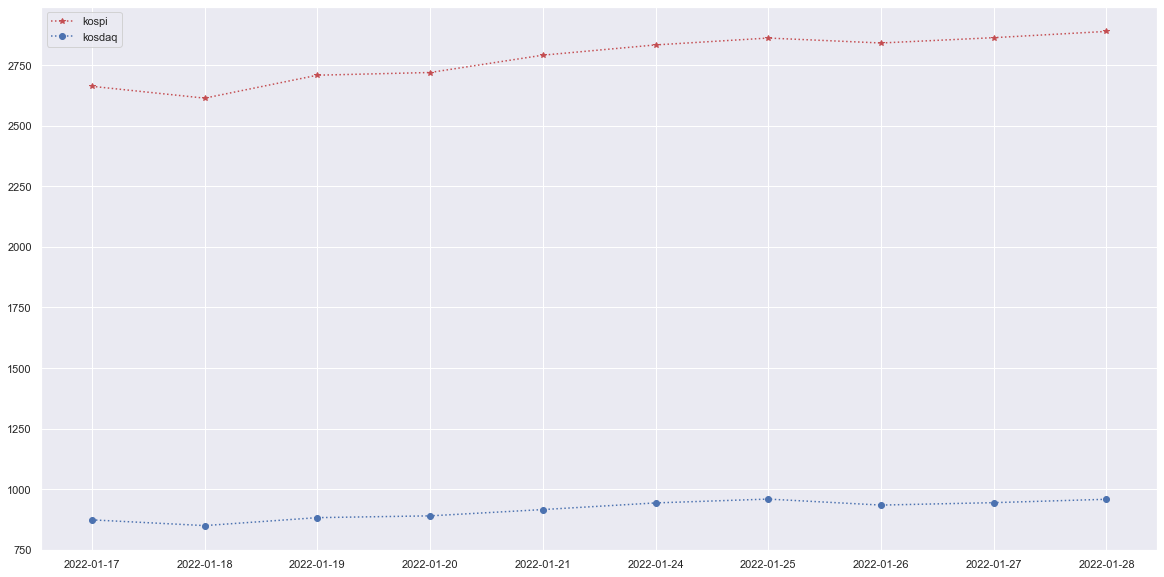

In [12]:
# 일자의 종가 등락 확인
plt.figure(figsize=(20, 10))

plt.plot(df_kospi["localTradedAt"].sort_values(), df_kospi["closePrice"], "r*:", label="kospi")
plt.plot(df_kosdaq["localTradedAt"].sort_values(), df_kosdaq["closePrice"], "bo:",label="kosdaq")
plt.legend()
plt.show()

In [17]:
conda install scikit-learn

Solving environment: done

## Package Plan ##

  environment location: /Users/kimhansaem/miniconda3

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scikit-learn-1.0.2         |   py38h9197a36_1         5.1 MB
    ------------------------------------------------------------
                                           Total:         5.1 MB

The following NEW packages will be INSTALLED:

  joblib             pkgs/main/noarch::joblib-1.1.0-pyhd3eb1b0_0
  scikit-learn       pkgs/main/osx-arm64::scikit-learn-1.0.2-py38h9197a36_1
  threadpoolctl      pkgs/main/noarch::threadpoolctl-2.2.0-pyh0d69192_0



scikit-learn-1.0.2   | 5.1 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [19]:
scaler = MinMaxScaler()
df_close_price = df_kospi['closePrice']
df_close_price

0    2663.340088
1    2614.489990
2    2709.239990
3    2720.389893
4    2792.000000
5    2834.290039
6    2862.679932
7    2842.280029
8    2864.239990
9    2890.100098
Name: closePrice, dtype: float32

In [20]:
close_price_scaled = scaler.fit_transform(df_close_price.values.reshape(-1, 1))
close_price_scaled

array([[0.17724323],
       [0.        ],
       [0.34378242],
       [0.38423824],
       [0.64406204],
       [0.7975035 ],
       [0.9005108 ],
       [0.82649326],
       [0.90617085],
       [1.        ]], dtype=float32)

In [21]:
from sklearn import preprocessing
scaled_kospi_cp = preprocessing.minmax_scale(df_kospi["closePrice"])
scaled_kosdaq_cp = preprocessing.minmax_scale(df_kosdaq["closePrice"])

In [22]:
scaled_kospi_cp, scaled_kosdaq_cp

(array([0.17724323, 0.        , 0.34378242, 0.38423824, 0.64406204,
        0.7975035 , 0.9005108 , 0.82649326, 0.90617085, 1.        ],
       dtype=float32),
 array([0.21595001, 0.        , 0.30017424, 0.36731577, 0.60445833,
        0.85521173, 1.0000005 , 0.7734542 , 0.86516905, 0.9926925 ],
       dtype=float32))

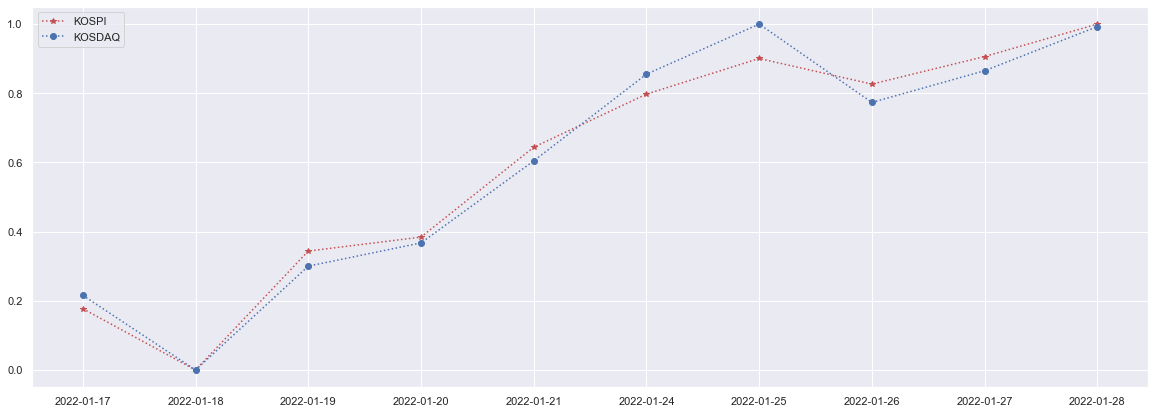

In [23]:
trade_dates = df_kospi["localTradedAt"][::-1]

plt.figure(figsize=(20, 7))
plt.plot(trade_dates, scaled_kospi_cp, "r*:", label='KOSPI')
plt.plot(trade_dates, scaled_kosdaq_cp, "bo:", label="KOSDAQ")
plt.legend()
plt.show()

In [24]:
df_kospi

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2022-01-28,2663.340088,48.85,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.87,"2,617.87","2,668.59","2,591.53"
1,2022-01-27,2614.489990,-94.75,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-3.50,"2,709.24","2,722.86","2,614.49"
2,2022-01-26,2709.239990,-11.15,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.41,"2,729.75","2,744.14","2,708.10"
3,2022-01-25,2720.389893,-71.61,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-2.56,"2,786.41","2,789.62","2,703.99"
4,2022-01-24,2792.000000,-42.29,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.49,"2,823.76","2,828.11","2,780.68"
5,2022-01-21,2834.290039,-28.39,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.99,"2,837.49","2,847.95","2,817.11"
6,2022-01-20,2862.679932,20.40,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.72,"2,842.28","2,862.70","2,830.97"
7,2022-01-19,2842.280029,-21.96,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.77,"2,840.34","2,871.79","2,832.18"
8,2022-01-18,2864.239990,-25.86,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.89,"2,898.98","2,902.79","2,857.26"
9,2022-01-17,2890.100098,-31.82,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.09,"2,918.55","2,919.67","2,875.98"


In [25]:
DOW_URL = "https://api.stock.naver.com/index/.DJI/price?page=1&pageSize=10"
df_dow = pd.read_json(DOW_URL)
df_dow.head()

,stockExchangeType,localTradedAt,worldIndexSymbol,openPrice,highPrice,lowPrice,closePrice,compareToPreviousClosePrice,fluctuationsRatio,compareToPreviousPrice
0,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2022-01-31T17:02:43-05:00,.DJI,"34,691.17","35,148.14","34,496.10","35,131.86",406.39,1.17,"{'code': '2', 'text': '상승', 'name': 'RISING'}"
1,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2022-01-28T16:54:31-05:00,.DJI,"34,135.24","34,731.77","33,807.51","34,725.47",564.69,1.65,"{'code': '2', 'text': '상승', 'name': 'RISING'}"
2,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2022-01-27T17:00:07-05:00,.DJI,"34,261.75","34,773.32","34,007.78","34,160.78",-7.31,-0.02,"{'code': '5', 'text': '하락', 'name': 'FALLING'}"
3,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2022-01-26T17:12:12-05:00,.DJI,"34,520.82","34,815.67","33,876.48","34,168.09",-129.64,-0.38,"{'code': '5', 'text': '하락', 'name': 'FALLING'}"
4,"{'code': 'NYS', 'zoneId': 'EST5EDT', 'nationTy...",2022-01-25T17:04:20-05:00,.DJI,"34,186.64","34,591.04","33,545.52","34,297.73",-66.77,-0.19,"{'code': '5', 'text': '하락', 'name': 'FALLING'}"


In [26]:
df_dow["tradeDatetime"] = pd.to_datetime(df_dow["localTradedAt"])
df_dow[["localTradedAt", "tradeDatetime"]]

,localTradedAt,tradeDatetime
0,2022-01-31T17:02:43-05:00,2022-01-31 17:02:43-05:00
1,2022-01-28T16:54:31-05:00,2022-01-28 16:54:31-05:00
2,2022-01-27T17:00:07-05:00,2022-01-27 17:00:07-05:00
3,2022-01-26T17:12:12-05:00,2022-01-26 17:12:12-05:00
4,2022-01-25T17:04:20-05:00,2022-01-25 17:04:20-05:00
5,2022-01-24T17:04:34-05:00,2022-01-24 17:04:34-05:00
6,2022-01-21T16:52:58-05:00,2022-01-21 16:52:58-05:00
7,2022-01-20T16:55:12-05:00,2022-01-20 16:55:12-05:00
8,2022-01-19T16:58:19-05:00,2022-01-19 16:58:19-05:00
9,2022-01-18T16:56:21-05:00,2022-01-18 16:56:21-05:00


In [27]:
df_dow["tradeDate"] = df_dow["tradeDatetime"].dt.date
df_dow["tradeDate"]

0    2022-01-31
1    2022-01-28
2    2022-01-27
3    2022-01-26
4    2022-01-25
5    2022-01-24
6    2022-01-21
7    2022-01-20
8    2022-01-19
9    2022-01-18
Name: tradeDate, dtype: object